In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#IMPORT THE NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/My Drive/telecom_churn_data.csv")

In [ ]:
my_data=pd.read_cv("/content/sample_data/california_housing_test.csv")

In [ ]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [ ]:
#print(df.circle_id.value_counts())
data.drop('circle_id', axis =1, inplace = True)

In [ ]:
#Saving in a series for Feature extraction
numbers = data.mobile_number
data.drop('mobile_number', axis = 1 , inplace=True)

# **1. Derive New Features**

In [ ]:
data['total_data_rech_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_rech_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']

data['amt_data_6'] = data[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
data['amt_data_7'] = data[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

data['AVG_amt_data_6_7'] = data[['amt_data_6','amt_data_7']].mean(axis=1)

In [ ]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,...,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,AVG_amt_data_6_7
0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58,252.0,252.0,614.0,504.0,559.0
1,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,...,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00,NaN,154.0,74.0,538.0,306.0
2,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,...,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00,NaN,NaN,168.0,315.0,241.5
3,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00,NaN,NaN,230.0,310.0,270.0
4,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,...,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00,56.0,NaN,252.0,350.0,301.0


# **2. Filter High Value Customers**

<br>

**As per the definition of high value customers are those whose recharge amount should be more than or equal to 70th percentile.**

In [ ]:
perc_70 = (data['AVG_amt_data_6_7'].quantile(0.7))
df=data[data['AVG_amt_data_6_7']>=perc_70]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 229 entries, loc_og_t2o_mou to AVG_amt_data_6_7
dtypes: float64(184), int64(33), object(12)
memory usage: 52.6+ MB


If we use greater than or equal to, we end up getting a little above 30K **(30001)** records as against 29.9K records specified in our problem statement.
We will conisder only greater thanwhich gives us 29.9K records as required to filter high value customers.

In [ ]:
perc_70 = (data['AVG_amt_data_6_7'].quantile(0.7))
df=data[data['AVG_amt_data_6_7']>perc_70]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 229 entries, loc_og_t2o_mou to AVG_amt_data_6_7
dtypes: float64(184), int64(33), object(12)
memory usage: 52.6+ MB


As we can see, now we have **29.95k** records required for our high valued customers

# **3. Tag churners and remove attributes of the churn phase**

In [ ]:
df['churn'] = np.where(
                            ((df['total_ic_mou_9'] == 0.00) | (df['total_og_mou_9'] == 0.00))
                            & ((df['vol_2g_mb_9'] == 0.00) | (df['vol_3g_mb_9'] == 0.00)), 1, 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(df['churn'].value_counts())
# print(df['churn_flag'].value_counts()/df.shape[0])

0    26698
1     3255
Name: churn, dtype: int64


In [ ]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,...,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,AVG_amt_data_6_7,churn
0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,NaN,NaN,1580.0,790.0,1185.0,1
8,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,...,NaN,NaN,0.00,0.00,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00,NaN,354.0,437.0,955.0,696.0,0
21,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4.48,6.16,23.34,29.98,91.81,87.93,104.81,107.54,0.75,0.00,1.58,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,720,0.00,0.00,0.00,0.00,NaN,NaN,600.0,680.0,640.0,0
23,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,89.36,205.89,111.88,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,48.96,50.66,33.58,15.74,82.94,83.01,148.56,83.73,0.00,0.00,0.00,2.45,0.0,...,212.17,NaN,301.78,150.67,212.17,NaN,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,NaN,1.0,1.0,1.0,604,40.45,51.86,0.00,0.00,NaN,712.0,0.0,1166.0,583.0,0


Let's drop all features related to churn phase i.e. 9th month

In [ ]:
df = df.drop(df.filter(regex='_9|sep', axis = 1).columns, axis=1)

## **Data Preprocessing**

In [ ]:
#checking info of our data
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 175 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loc_og_t2o_mou            29730 non-null  float64
 1   std_og_t2o_mou            29730 non-null  float64
 2   loc_ic_t2o_mou            29730 non-null  float64
 3   last_date_of_month_6      29953 non-null  object 
 4   last_date_of_month_7      29926 non-null  object 
 5   last_date_of_month_8      29788 non-null  object 
 6   arpu_6                    29953 non-null  float64
 7   arpu_7                    29953 non-null  float64
 8   arpu_8                    29953 non-null  float64
 9   onnet_mou_6               29411 non-null  float64
 10  onnet_mou_7               29417 non-null  float64
 11  onnet_mou_8               28781 non-null  float64
 12  offnet_mou_6              29411 non-null  float64
 13  offnet_mou_7              29417 non-null  float64
 14  offne

**Checking for missing Values**

In [ ]:
df.isna().sum()

loc_og_t2o_mou            223
std_og_t2o_mou            223
loc_ic_t2o_mou            223
last_date_of_month_6        0
last_date_of_month_7       27
                        ...  
total_data_rech_7       12915
amt_data_6                  0
amt_data_7                  0
AVG_amt_data_6_7            0
churn                       0
Length: 175, dtype: int64

In [ ]:
#Checking Percentages of Missing Values
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
119,date_of_last_rech_data_8,46.80
125,max_rech_data_8,46.80
143,arpu_3g_8,46.80
134,av_rech_amt_data_8,46.80
131,count_rech_3g_8,46.80
...,...,...
90,total_ic_mou_6,0.00
62,total_og_mou_8,0.00
61,total_og_mou_7,0.00
60,total_og_mou_6,0.00


There are quite a lot of Missing Values in our dataset. We need to treat them accordingly.

Let's first identify features with single or unique value since they will be less significant and we can drop them.

In [ ]:
unique_stats = pd.DataFrame(df.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'unique'})
print(unique_stats[unique_stats['unique'] == 1])

print('%d features with a single unique value.\n' % len(unique_stats[unique_stats['unique'] == 1]))

                 feature  unique
0         loc_og_t2o_mou       1
1         std_og_t2o_mou       1
2         loc_ic_t2o_mou       1
3   last_date_of_month_6       1
4   last_date_of_month_7       1
5   last_date_of_month_8       1
45      std_og_t2c_mou_6       1
46      std_og_t2c_mou_7       1
47      std_og_t2c_mou_8       1
84      std_ic_t2o_mou_6       1
85      std_ic_t2o_mou_7       1
86      std_ic_t2o_mou_8       1
12 features with a single unique value.



In [ ]:
df = df.drop(columns = list(unique_stats[unique_stats['unique'] == 1]['feature']))

### **Dealing with Missing Values**
#### Let's start with one of the highest missing feature arpu_3g_8

In [ ]:
df['arpu_3g_8'].isna().sum()

14018

Let's check them to see how we can deal with the null values here. Approximately 46% of the data is missing. 
Let's see the appropriate way of treating these missing values: mean or median etc

In [ ]:
df['arpu_3g_8'].describe()

count   15935.00
mean      118.11
std       218.98
min       -24.49
25%         0.00
50%        10.02
75%       179.63
max      3716.90
Name: arpu_3g_8, dtype: float64

Since the range is huge (i.e. max-min), we can't go with either mean or median as they can skew or distort the whole scenario.
We will now check the data related variables of 8th month to decide on filling up the missing values

In [ ]:
df[df['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                            'fb_user_8'
                           ]].nunique()

date_of_last_rech_data_8    0
total_rech_data_8           0
max_rech_data_8             0
count_rech_2g_8             0
count_rech_3g_8             0
av_rech_amt_data_8          0
vol_2g_mb_8                 1
vol_3g_mb_8                 1
arpu_2g_8                   0
night_pck_user_8            0
monthly_2g_8                1
sachet_2g_8                 1
monthly_3g_8                1
sachet_3g_8                 1
fb_user_8                   0
dtype: int64

In [ ]:
df[df['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                            'fb_user_8'
                           ]].head()

,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8
7,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
21,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
38,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
41,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
48,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan




We can see from the above table that the customers hasn't bought the data at all in month 8.
So we can fill the gap with 0

In [ ]:
df['arpu_3g_8'].fillna(0,inplace=True)

In [ ]:
df['arpu_3g_8'].isna().sum()

0

It's clearly evident from the above table that most of the missing values are coming from mobile related data only. We can therefore follow the same approach and fill the gap.

Let's check the other missing feature 'isd_og_mou_8'

In [ ]:
df['isd_og_mou_8'].isna().sum()

1172

In [ ]:
df['isd_og_mou_8'].describe()

count   28781.00
mean        2.03
std        45.65
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      5681.54
Name: isd_og_mou_8, dtype: float64

As we can see, the range is huge here as well. We can also suspect outliers in here. 

Let's try to check the all outgoing related features of 8th month

In [ ]:
df[df['isd_og_mou_8'].isna()][['loc_og_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8']].nunique()

loc_og_mou_8      0
std_og_mou_8      0
spl_og_mou_8      0
og_others_8       0
total_og_mou_8    1
dtype: int64

In [ ]:
df[df['isd_og_mou_8'].isna()][['loc_og_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8']].head()

,loc_og_mou_8,std_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8
111,nan,nan,nan,nan,0.00
188,nan,nan,nan,nan,0.00
358,nan,nan,nan,nan,0.00
527,nan,nan,nan,nan,0.00
539,nan,nan,nan,nan,0.00



From the above we can impute the missing values of isd_og_mou_8 with 0
We can also do the same for all the rest

In [ ]:
df.fillna(0, inplace=True)
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,AVG_amt_data_6_7,churn
0,197.38,214.82,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.00,0.00,0.00,0,0,0,0,0,0,1,1,1,0,0,0,1.00,1.00,1.00,968,30.40,0.00,101.20,252.00,252.00,614.00,504.00,559.00,1
7,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,802,57.74,19.38,18.74,0.00,0.00,1580.00,790.00,1185.00,1
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,...,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,1,3,0,0,0,0,0,0,0.00,1.00,1.00,315,21.03,910.65,122.16,0.00,354.00,437.00,955.00,696.00,0
21,514.45,597.75,637.76,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.00,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,720,0.00,0.00,0.00,0.00,0.00,600.00,680.00,640.00,0
23,74.35,193.90,366.97,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.00,0.00,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,2.36,...,0.00,0.48,0.01,0.00,599.09,1009.92,0.00,306.57,197.27,0.00,301.78,150.67,0.00,0.00,0.00,0,0,0,0,0,0,0,2,1,0,0,1,0.00,1.00,1.00,604,40.45,51.86,0.00,0.00,712.00,0.00,1166.00,583.00,0


In [ ]:
#check for Null values again
df.isna().sum()

arpu_6               0
arpu_7               0
arpu_8               0
onnet_mou_6          0
onnet_mou_7          0
                    ..
total_data_rech_7    0
amt_data_6           0
amt_data_7           0
AVG_amt_data_6_7     0
churn                0
Length: 163, dtype: int64

All Missing Values have been filled with **o**

## **Exploratory Analysis**

We will be exploring our data further to see gain more insights. This will be in the form of visualisations to find patterns, relationships, etc.

### **Churn**

In [ ]:
#Let's see how many "0" and "1" are there
df['churn'].value_counts()

0    26698
1     3255
Name: churn, dtype: int64

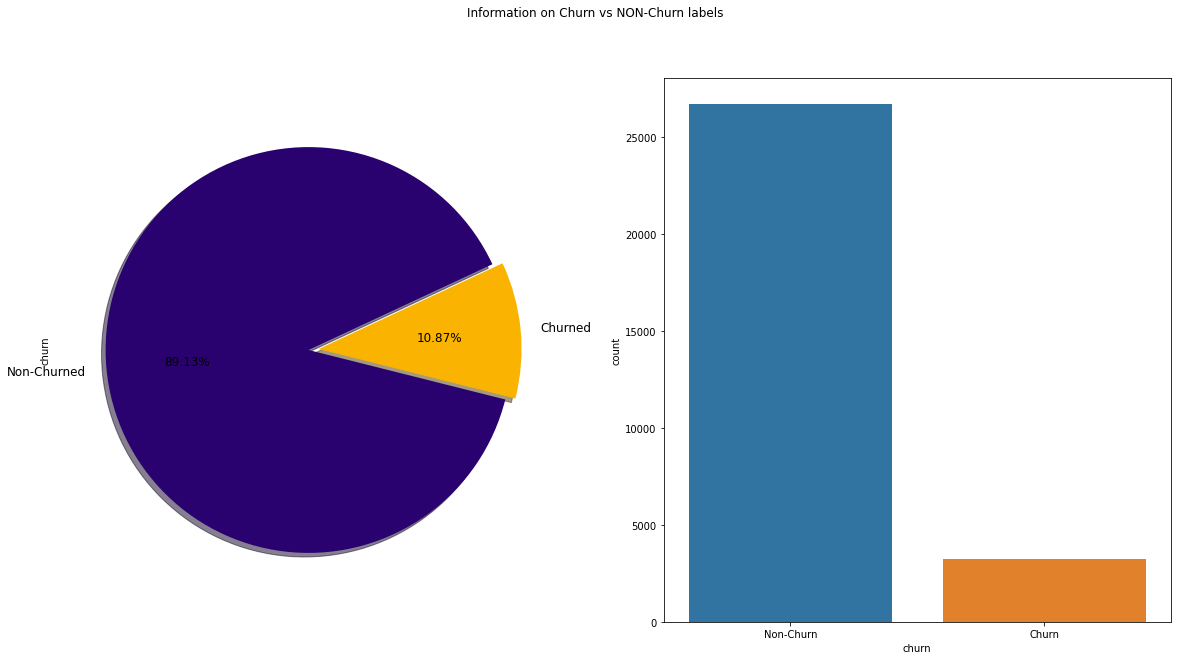

In [ ]:
# Let's Visualise it

import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(1,2,figsize=(20,10))

colors = ["#29026F", "#FAB301"]
labels = 'Non-Churned','Churned'
plt.suptitle('Information on Churn vs NON-Churn labels')
df.churn.value_counts().plot.pie(explode=[0,0.05], autopct='%1.2f%%', ax =ax[0], shadow = True,
                                    colors = colors, labels = labels, fontsize =12, startangle=25)
#ax[0].set_ylabel('% of ADR vs Non-ADR')

palette = ["#FAB301", "#29026F"]
sns.countplot(x='churn', data=df)
ax[1].set_xticklabels(['Non-Churn','Churn'],rotation=0, rotation_mode="anchor")
plt.show()

It is clearly seen from the above that our **Churn** feature is **imbalance**

*  1 for Churn
*  0 for Non-Churn

We will deal with the **imbalance** later. For now, let's see the other features as well.



## arpu (Average Revenue per user)

<Figure size 1296x720 with 0 Axes>

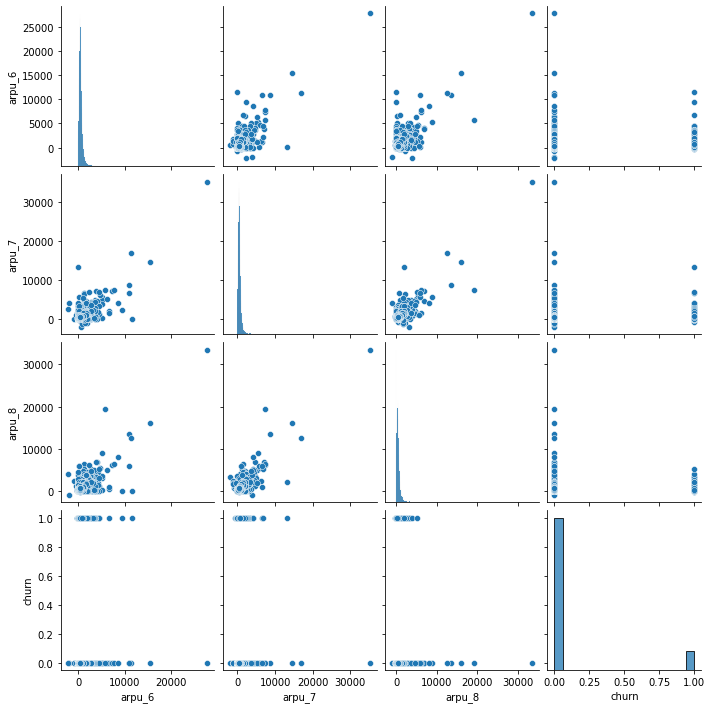

In [ ]:
plt.figure(figsize = (18,10))
sns.pairplot(data=df[['arpu_6','arpu_7','arpu_8','churn']])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


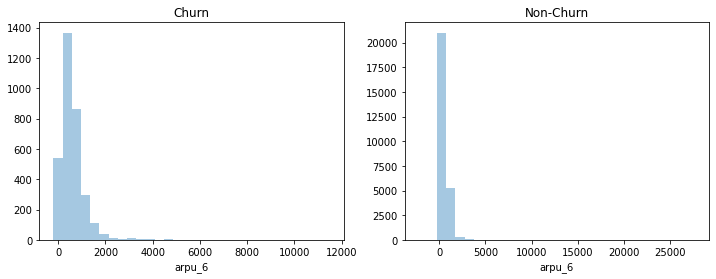

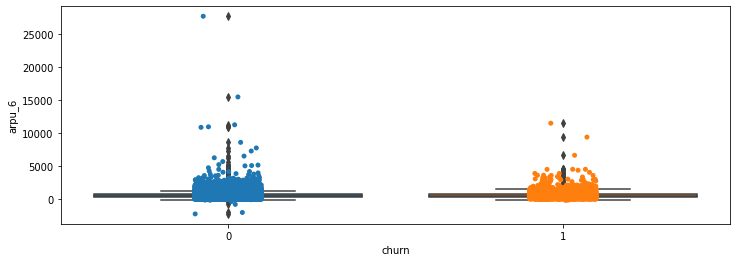

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='arpu_6', data=df)
sns.stripplot(x='churn', y='arpu_6', data=df, jitter=True, edgecolor="blue")

The average revenue of non-churn custmers are higher than churn customers

## onnet_mou (On network/ within the same network usage)

<Figure size 2016x1080 with 0 Axes>

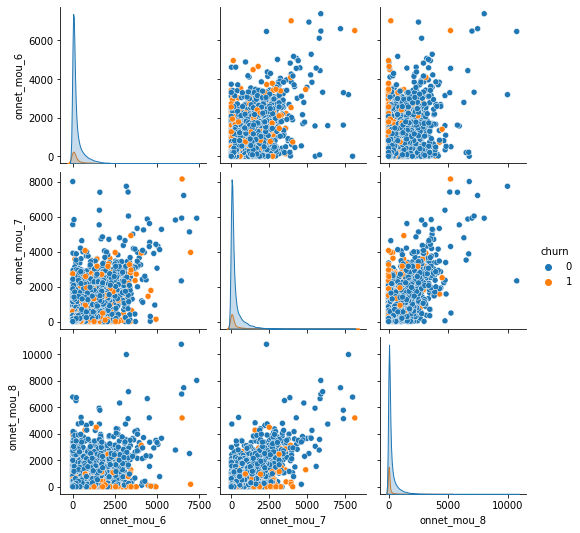

In [ ]:
plt.figure(figsize = (28,15))
sns.pairplot(data=df[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']],hue='churn')

## total_rech_amt_
#### Total recharge amount in a particular month

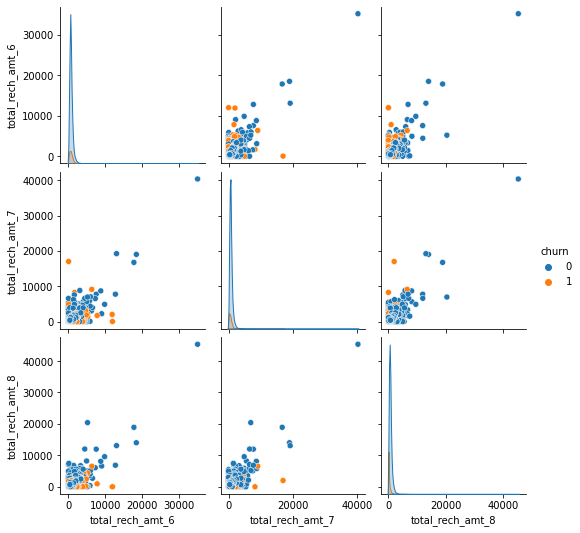

In [ ]:
sns.pairplot(data=df[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn']],hue='churn')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


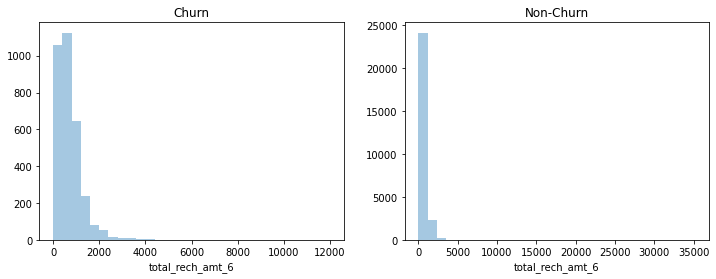

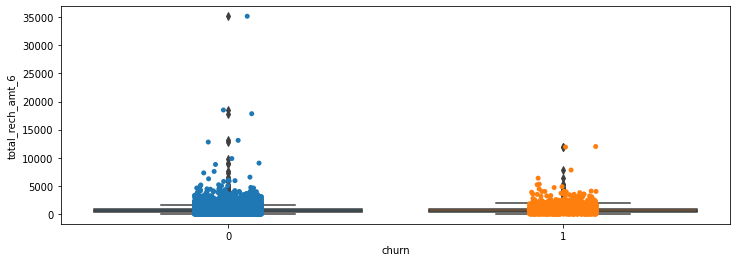

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn']==1].total_rech_amt_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn']==0].total_rech_amt_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='total_rech_amt_6', data=df)
sns.stripplot(x='churn', y='total_rech_amt_6', data=df, jitter=True, edgecolor="gray")

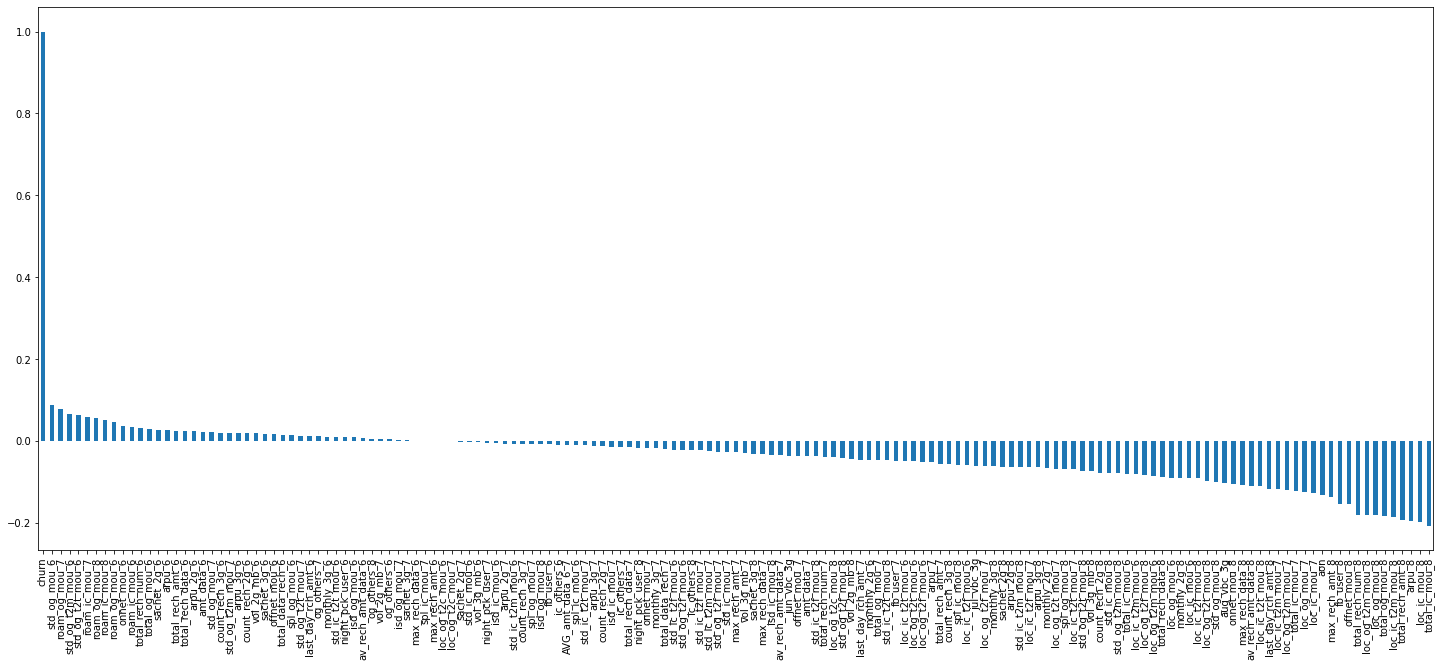

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(25,10))
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

Avg STD Outgoing Calls for Month 6 & 7, Outgoing calls in Roaming seems to be positively correlated with Churn while Avg Revenue, No Of Recharge for 8th Month seems negatively correlated.

**We can also do it for all the other features**

In [ ]:
# plt.figure(figsize = (30,20))
# sns.heatmap(df.corr(), annot=True ,fmt='g', cmap="PiYG")
# plt.show()

## **Derived Features**

We will first start by formating date features

In [ ]:
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])

df['date_of_last_rech_data_6'] = pd.to_datetime(df['date_of_last_rech_data_6'])
df['date_of_last_rech_data_7'] = pd.to_datetime(df['date_of_last_rech_data_7'])
df['date_of_last_rech_data_8'] = pd.to_datetime(df['date_of_last_rech_data_8'])

# df['mobile_number'] = df['mobile_number'].astype(str)

In [ ]:
# Now let's create new features from date column
df['date_of_last_rech_day_6'] = df['date_of_last_rech_6'].dt.day
df['date_of_last_rech_dayofwk_6'] = df['date_of_last_rech_6'].dt.dayofweek.astype(str)

df['date_of_last_rech_day_7'] = df['date_of_last_rech_7'].dt.day
df['date_of_last_rech_dayofwk_7'] = df['date_of_last_rech_7'].dt.dayofweek.astype(str)

df['date_of_last_rech_day_8'] = df['date_of_last_rech_8'].dt.day
df['date_of_last_rech_dayofwk_8'] = df['date_of_last_rech_8'].dt.dayofweek.astype(str)

df['date_of_last_rech_data_day_6'] = df['date_of_last_rech_data_6'].dt.day
df['date_of_last_rech_data_dayofwk_6'] = df['date_of_last_rech_data_6'].dt.dayofweek.astype(str)

df['date_of_last_rech_data_day_7'] = df['date_of_last_rech_data_7'].dt.day
df['date_of_last_rech_data_dayofwk_7'] = df['date_of_last_rech_data_7'].dt.dayofweek.astype(str)

df['date_of_last_rech_data_day_8'] = df['date_of_last_rech_data_8'].dt.day
df['date_of_last_rech_data_dayofwk_8'] = df['date_of_last_rech_data_8'].dt.dayofweek.astype(str)


In [ ]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 175 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   arpu_6                            29953 non-null  float64       
 1   arpu_7                            29953 non-null  float64       
 2   arpu_8                            29953 non-null  float64       
 3   onnet_mou_6                       29953 non-null  float64       
 4   onnet_mou_7                       29953 non-null  float64       
 5   onnet_mou_8                       29953 non-null  float64       
 6   offnet_mou_6                      29953 non-null  float64       
 7   offnet_mou_7                      29953 non-null  float64       
 8   offnet_mou_8                      29953 non-null  float64       
 9   roam_ic_mou_6                     29953 non-null  float64       
 10  roam_ic_mou_7                     29953 non-n

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,AVG_amt_data_6_7,churn,date_of_last_rech_day_6,date_of_last_rech_day_7,date_of_last_rech_day_8,date_of_last_rech_data_day_6,date_of_last_rech_data_day_7,date_of_last_rech_data_day_8
count,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,...,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00,29953.00
mean,558.82,561.16,508.89,260.90,268.05,234.35,373.80,378.23,335.12,16.12,12.65,12.51,26.60,20.16,19.89,84.57,85.76,78.15,163.31,163.09,151.81,6.35,6.43,5.89,1.58,1.89,1.70,254.24,255.29,235.86,165.90,174.38,148.59,179.44,187.96,157.32,1.81,1.83,1.59,347.15,...,67.10,68.72,62.83,63.53,64.79,58.45,0.01,0.01,0.01,0.17,0.18,0.15,1.07,1.22,1.06,0.22,0.23,0.21,0.21,0.23,0.20,0.52,0.52,0.48,1209.28,169.28,179.06,158.73,456.39,528.96,1117.51,1189.89,1153.70,0.11,26.40,27.19,26.19,11.72,12.41,11.28
std,460.87,480.03,502.14,459.85,480.30,458.75,482.71,499.14,481.99,76.34,75.83,74.18,116.27,96.13,104.80,228.96,240.70,227.54,250.22,241.68,233.75,22.14,21.96,19.52,6.31,9.14,7.15,378.55,375.62,363.55,403.99,421.47,397.84,409.14,433.81,409.04,11.99,12.99,10.94,608.85,...,179.27,183.26,170.24,161.12,165.40,152.71,0.12,0.11,0.11,0.44,0.45,0.41,2.51,2.74,2.54,0.61,0.66,0.62,0.99,1.09,1.10,0.50,0.50,0.50,957.45,421.13,443.76,416.99,1419.71,1477.10,1567.14,1633.21,1359.53,0.31,4.83,4.82,6.31,11.38,11.82,11.53
min,-2258.71,-2014.05,-945.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-30.28,-26.04,-24.49,-15.32,-15.48,-24.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,478.50,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,310.14,310.07,231.62,17.09,16.04,10.44,71.61,69.98,46.76,0.00,0.00,0.00,0.00,0.00,0.00,4.38,4.63,2.54,19.21,20.49,13.13,0.00,0.00,0.00,0.00,0.00,0.00,32.26,34.51,22.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,460.00,0.00,0.00,0.00,0.00,0.00,547.00,551.00,604.00,0.00,25.00,26.00,25.00,1.00,1.00,1.00
50%,482.35,481.50,427.60,84.64,82.83,65.66,222.56,220.04,182.84,0.00,0.00,0.00,0.00,0.00,0.00,24.36,24.68,20.74,77.26,78.99,67.79,0.00,0.10,0.00,0.00,0.00,0.00,124.59,128.06,111.01,2.71,2.68,0.63,16.36,16.06,9.46,0.00,0.00,0.00,45

Checking correlation between features

In [ ]:
joincorr= df.corr()
df_corr = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
df_corr[((df_corr[0] < 1) & (df_corr[0] >= 0.4)) | ((df_corr[0] <= -0.4) & (df_corr[0] > -1))]

,level_0,level_1,0
18067,count_rech_2g_8,sachet_2g_8,0.99
22441,sachet_2g_8,count_rech_2g_8,0.99
17903,count_rech_2g_7,sachet_2g_7,0.99
22277,sachet_2g_7,count_rech_2g_7,0.99
22113,sachet_2g_6,count_rech_2g_6,0.98
...,...,...,...
19062,av_rech_amt_data_8,amt_data_7,0.40
19708,vol_3g_mb_6,aug_vbc_3g,0.40
24244,aug_vbc_3g,vol_3g_mb_6,0.40
24566,jun_vbc_3g,av_rech_amt_data_8,0.40


From the above we can notice high correlation between same features and only month differs.
How can we take care of those?
We can eliminate as we will lose information of eith good or action month.


Let's create new features from good month and compare them with action phase

In [ ]:
df['AVG_arpu_6_7'] = df[['arpu_6','arpu_7']].mean(axis=1)
df['is_arpu_flag'] = np.where((df['arpu_8'] > df['AVG_arpu_6_7']), 0, 1)

df['AVG_onnet_mou_6_7'] = df[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
df['is_onnet_mou_flag'] = np.where((df['onnet_mou_8'] > df['AVG_onnet_mou_6_7']), 0, 1)

df['AVG_offnet_mou_6_7'] = df[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
df['is_offnet_mou_flag'] = np.where((df['offnet_mou_8'] > df['AVG_offnet_mou_6_7']), 0, 1)

df['AVG_roam_ic_mou_6_7'] = df[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
df['is_roam_ic_mou_flag'] = np.where((df['roam_ic_mou_8'] > df['AVG_roam_ic_mou_6_7']), 0, 1)

df['AVG_roam_og_mou_6_7'] = df[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
df['is_roam_og_mou_flag'] = np.where((df['roam_og_mou_8'] > df['AVG_roam_og_mou_6_7']), 0, 1)

df['AVG_loc_og_t2t_mou_6_7'] = df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
df['is_loc_og_t2t_mou_flag'] = np.where((df['loc_og_t2t_mou_8'] > df['AVG_loc_og_t2t_mou_6_7']), 0, 1)

df['AVG_loc_og_t2m_mou_6_7'] = df[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
df['is_loc_og_t2m_mou_flag'] = np.where((df['loc_og_t2m_mou_8'] > df['AVG_loc_og_t2m_mou_6_7']), 0, 1)

df['AVG_loc_og_t2f_mou_6_7'] = df[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
df['is_loc_og_t2f_mou_flag'] = np.where((df['loc_og_t2f_mou_8'] > df['AVG_loc_og_t2f_mou_6_7']), 0, 1)

df['AVG_loc_og_t2c_mou_6_7'] = df[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
df['is_loc_og_t2c_mou_flag'] = np.where((df['loc_og_t2c_mou_8'] > df['AVG_loc_og_t2c_mou_6_7']), 0, 1)

df['AVG_std_og_t2t_mou_6_7'] = df[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
df['is_std_og_t2t_mou_flag'] = np.where((df['std_og_t2t_mou_8'] > df['AVG_std_og_t2t_mou_6_7']), 0, 1)

df['AVG_std_og_t2m_mou_6_7'] = df[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
df['is_std_og_t2m_mou_flag'] = np.where((df['std_og_t2m_mou_8'] > df['AVG_std_og_t2m_mou_6_7']), 0, 1)

df['AVG_std_og_t2f_mou_6_7'] = df[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
df['is_std_og_t2f_mou_flag'] = np.where((df['std_og_t2f_mou_8'] > df['AVG_std_og_t2f_mou_6_7']), 0, 1)

df['AVG_isd_og_mou_6_7'] = df[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
df['is_isd_og_mou_flag'] = np.where((df['isd_og_mou_8'] > df['AVG_isd_og_mou_6_7']), 0, 1)

df['AVG_spl_og_mou_6_7'] = df[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
df['is_spl_og_mou_flag'] = np.where((df['spl_og_mou_8'] > df['AVG_spl_og_mou_6_7']), 0, 1)

df['AVG_og_others_6_7'] = df[['og_others_6','og_others_7']].mean(axis=1)
df['is_og_others_flag'] = np.where((df['og_others_8'] > df['AVG_og_others_6_7']), 0, 1)


df['AVG_loc_ic_t2t_mou_6_7'] = df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
df['is_loc_ic_t2t_mou_flag'] = np.where((df['loc_ic_t2t_mou_8'] > df['AVG_loc_ic_t2t_mou_6_7']), 0, 1)

df['AVG_loc_ic_t2m_mou_6_7'] = df[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
df['is_loc_ic_t2m_mou_flag'] = np.where((df['loc_ic_t2m_mou_8'] > df['AVG_loc_ic_t2m_mou_6_7']), 0, 1)

df['AVG_loc_ic_t2f_mou_6_7'] = df[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
df['is_loc_ic_t2f_mou_flag'] = np.where((df['loc_ic_t2f_mou_8'] > df['AVG_loc_ic_t2f_mou_6_7']), 0, 1)

df['AVG_std_ic_t2t_mou_6_7'] = df[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
df['is_std_ic_t2t_mou_flag'] = np.where((df['std_ic_t2t_mou_8'] > df['AVG_std_ic_t2t_mou_6_7']), 0, 1)

df['AVG_std_ic_t2m_mou_6_7'] = df[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
df['is_std_ic_t2m_mou_flag'] = np.where((df['std_ic_t2m_mou_8'] > df['AVG_std_ic_t2m_mou_6_7']), 0, 1)

df['AVG_std_ic_t2f_mou_6_7'] = df[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
df['is_std_ic_t2f_mou_flag'] = np.where((df['std_ic_t2f_mou_8'] > df['AVG_std_ic_t2f_mou_6_7']), 0, 1)

df['AVG_spl_ic_mou_6_7'] = df[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
df['is_spl_ic_mou_flag'] = np.where((df['spl_ic_mou_8'] > df['AVG_spl_ic_mou_6_7']), 0, 1)

df['AVG_isd_ic_mou_6_7'] = df[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
df['is_isd_ic_mou_flag'] = np.where((df['isd_ic_mou_8'] > df['AVG_isd_ic_mou_6_7']), 0, 1)

df['AVG_ic_others_6_7'] = df[['ic_others_6','ic_others_7']].mean(axis=1)
df['is_ic_others_flag'] = np.where((df['ic_others_8'] > df['AVG_ic_others_6_7']), 0, 1)

df['AVG_total_rech_amt_6_7'] = df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
df['is_total_rech_amt_flag'] = np.where((df['total_rech_amt_8'] > df['AVG_total_rech_amt_6_7']), 0, 1)

df['AVG_vol_2g_mb_6_7'] = df[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
df['is_vol_2g_mb_flag'] = np.where((df['vol_2g_mb_8'] > df['AVG_vol_2g_mb_6_7']), 0, 1)

df['AVG_vol_3g_mb_6_7'] = df[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
df['is_vol_3g_mb_flag'] = np.where((df['vol_3g_mb_8'] > df['AVG_vol_3g_mb_6_7']), 0, 1)

df['AVG_arpu_3g_6_7'] = df[['arpu_3g_6','arpu_3g_7']].mean(axis=1)
df['is_arpu_3g_flag'] = np.where((df['arpu_3g_8'] > df['AVG_arpu_3g_6_7']), 0, 1)

df['AVG_arpu_2g_6_7'] = df[['arpu_2g_6','arpu_2g_7']].mean(axis=1)
df['is_arpu_2g_flag'] = np.where((df['arpu_2g_8'] > df['AVG_arpu_2g_6_7']), 0, 1)

df['AVG_vbc_3g_6_7'] = df[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
df['is_vbc_3g_flag'] = np.where((df['aug_vbc_3g'] > df['AVG_vbc_3g_6_7']), 0, 1)

df['AVG_loc_og_mou_6_7'] = df[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
df['is_loc_og_mou_flag'] = np.where((df['loc_og_mou_8'] > df['AVG_loc_og_mou_6_7']), 0, 1)

df['AVG_std_og_mou_6_7'] = df[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
df['is_std_og_mou_flag'] = np.where((df['std_og_mou_8'] > df['AVG_std_og_mou_6_7']), 0, 1)

df['AVG_total_og_mou_6_7'] = df[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
df['is_total_og_mou_flag'] = np.where((df['total_og_mou_8'] > df['AVG_total_og_mou_6_7']), 0, 1)

df['AVG_loc_ic_mou_6_7'] = df[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
df['is_loc_ic_mou_flag'] = np.where((df['loc_ic_mou_8'] > df['AVG_loc_ic_mou_6_7']), 0, 1)

df['AVG_std_ic_mou_6_7'] = df[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
df['is_std_ic_mou_flag'] = np.where((df['std_ic_mou_8'] > df['AVG_std_ic_mou_6_7']), 0, 1)

df['AVG_total_ic_mou_6_7'] = df[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
df['is_total_ic_mou_flag'] = np.where((df['total_ic_mou_8'] > df['AVG_total_ic_mou_6_7']), 0, 1)

df['AVG_night_pck_user_6_7'] = df[['night_pck_user_6','night_pck_user_7']].mean(axis=1)
df['is_night_pck_user_flag'] = np.where((df['night_pck_user_8'] > df['AVG_night_pck_user_6_7']), 0, 1)

df['AVG_monthly_2g_6_7'] = df[['monthly_2g_6','monthly_2g_7']].mean(axis=1)
df['is_monthly_2g_flag'] = np.where((df['monthly_2g_8'] > df['AVG_monthly_2g_6_7']), 0, 1)

df['AVG_sachet_2g_6_7'] = df[['sachet_2g_6','sachet_2g_7']].mean(axis=1)
df['is_sachet_2g_flag'] = np.where((df['sachet_2g_8'] > df['AVG_sachet_2g_6_7']), 0, 1)

df['AVG_monthly_3g_6_7'] = df[['monthly_3g_6','monthly_3g_7']].mean(axis=1)
df['is_monthly_3g_flag'] = np.where((df['monthly_3g_8'] > df['AVG_monthly_3g_6_7']), 0, 1)

df['AVG_sachet_3g_6_7'] = df[['sachet_3g_6','sachet_3g_7']].mean(axis=1)
df['is_sachet_3g_flag'] = np.where((df['sachet_3g_8'] > df['AVG_sachet_3g_6_7']), 0, 1)

df['AVG_fb_user_6_7'] = df[['fb_user_6','fb_user_7']].mean(axis=1)
df['is_fb_user_flag'] = np.where((df['fb_user_8'] > df['AVG_fb_user_6_7']), 0, 1)

Create month on month change features to undersatnd any risk associated with it

In [ ]:
# Create month on month change features to understand any risk associated with the churn
df['loc_og_t2t_mou_7diff6'] = df['loc_og_t2t_mou_7'] - df['loc_og_t2t_mou_6']
df['loc_og_t2m_mou_7diff6'] = df['loc_og_t2m_mou_7'] - df['loc_og_t2m_mou_6']
df['loc_og_t2f_mou_7diff6'] = df['loc_og_t2f_mou_7'] - df['loc_og_t2f_mou_6']
df['loc_og_t2c_mou_7diff6'] = df['loc_og_t2c_mou_7'] - df['loc_og_t2c_mou_6']
df['loc_og_mou_7diff6'] = df['loc_og_mou_7'] - df['loc_og_mou_6']
df['std_og_t2t_mou_7diff6'] = df['std_og_t2t_mou_7'] - df['std_og_t2t_mou_6']
df['std_og_t2m_mou_7diff6'] = df['std_og_t2m_mou_7'] - df['std_og_t2m_mou_6']
df['std_og_t2f_mou_7diff6'] = df['std_og_t2f_mou_7'] - df['std_og_t2f_mou_6']
df['std_og_mou_7diff6'] = df['std_og_mou_7'] - df['std_og_mou_6']
df['loc_og_mou_7diff6'] = df['loc_og_mou_7'] - df['loc_og_mou_6']
df['std_og_mou_7diff6'] = df['std_og_mou_7'] - df['std_og_mou_6']
df['isd_og_mou_7diff6'] = df['isd_og_mou_7'] - df['isd_og_mou_6']
df['spl_og_mou_7diff6'] = df['spl_og_mou_7'] - df['spl_og_mou_6']
df['og_others_7diff6'] = df['og_others_7'] - df['og_others_6']
df['total_og_mou_7diff6'] = df['total_og_mou_7'] - df['total_og_mou_6']

df['loc_og_t2t_mou_8diff7'] = df['loc_og_t2t_mou_8'] - df['loc_og_t2t_mou_7']
df['loc_og_t2m_mou_8diff7'] = df['loc_og_t2m_mou_8'] - df['loc_og_t2m_mou_7']
df['loc_og_t2f_mou_8diff7'] = df['loc_og_t2f_mou_8'] - df['loc_og_t2f_mou_7']
df['loc_og_t2c_mou_8diff7'] = df['loc_og_t2c_mou_8'] - df['loc_og_t2c_mou_7']
df['loc_og_mou_8diff7'] = df['loc_og_mou_8'] - df['loc_og_mou_7']
df['std_og_t2t_mou_8diff7'] = df['std_og_t2t_mou_8'] - df['std_og_t2t_mou_7']
df['std_og_t2m_mou_8diff7'] = df['std_og_t2m_mou_8'] - df['std_og_t2m_mou_7']
df['std_og_t2f_mou_8diff7'] = df['std_og_t2f_mou_8'] - df['std_og_t2f_mou_7']
df['std_og_mou_8diff7'] = df['std_og_mou_8'] - df['std_og_mou_7']
df['loc_og_mou_8diff7'] = df['loc_og_mou_8'] - df['loc_og_mou_7']
df['std_og_mou_8diff7'] = df['std_og_mou_8'] - df['std_og_mou_7']
df['isd_og_mou_8diff7'] = df['isd_og_mou_8'] - df['isd_og_mou_7']
df['spl_og_mou_8diff7'] = df['spl_og_mou_8'] - df['spl_og_mou_7']
df['og_others_8diff7'] = df['og_others_8'] - df['og_others_7']
df['total_og_mou_8diff7'] = df['total_og_mou_8'] - df['total_og_mou_7']

df['loc_ic_t2t_mou_7diff6'] = df['loc_ic_t2t_mou_7'] - df['loc_ic_t2t_mou_6']
df['loc_ic_t2m_mou_7diff6'] = df['loc_ic_t2m_mou_7'] - df['loc_ic_t2m_mou_6']
df['loc_ic_t2f_mou_7diff6'] = df['loc_ic_t2f_mou_7'] - df['loc_ic_t2f_mou_6']
df['loc_ic_mou_7diff6'] = df['loc_ic_mou_7'] - df['loc_ic_mou_6']
df['std_ic_t2t_mou_7diff6'] = df['std_ic_t2t_mou_7'] - df['std_ic_t2t_mou_6']
df['std_ic_t2m_mou_7diff6'] = df['std_ic_t2m_mou_7'] - df['std_ic_t2m_mou_6']
df['std_ic_t2f_mou_7diff6'] = df['std_ic_t2f_mou_7'] - df['std_ic_t2f_mou_6']
df['std_ic_mou_7diff6'] = df['std_ic_mou_7'] - df['std_ic_mou_6']
df['loc_ic_mou_7diff6'] = df['loc_ic_mou_7'] - df['loc_ic_mou_6']
df['std_ic_mou_7diff6'] = df['std_ic_mou_7'] - df['std_ic_mou_6']
df['spl_ic_mou_7diff6'] = df['spl_ic_mou_7'] - df['spl_ic_mou_6']
df['isd_ic_mou_7diff6'] = df['isd_ic_mou_7'] - df['isd_ic_mou_6']
df['ic_others_7diff6'] = df['ic_others_7'] - df['ic_others_6']
df['total_ic_mou_7diff6'] = df['total_ic_mou_7'] - df['total_ic_mou_6']

df['loc_ic_t2t_mou_8diff7'] = df['loc_ic_t2t_mou_8'] - df['loc_ic_t2t_mou_7']
df['loc_ic_t2m_mou_8diff7'] = df['loc_ic_t2m_mou_8'] - df['loc_ic_t2m_mou_7']
df['loc_ic_t2f_mou_8diff7'] = df['loc_ic_t2f_mou_8'] - df['loc_ic_t2f_mou_7']
df['loc_ic_mou_8diff7'] = df['loc_ic_mou_8'] - df['loc_ic_mou_7']
df['std_ic_t2t_mou_8diff7'] = df['std_ic_t2t_mou_8'] - df['std_ic_t2t_mou_7']
df['std_ic_t2m_mou_8diff7'] = df['std_ic_t2m_mou_8'] - df['std_ic_t2m_mou_7']
df['std_ic_t2f_mou_8diff7'] = df['std_ic_t2f_mou_8'] - df['std_ic_t2f_mou_7']
df['std_ic_mou_8diff7'] = df['std_ic_mou_8'] - df['std_ic_mou_7']
df['loc_ic_mou_8diff7'] = df['loc_ic_mou_8'] - df['loc_ic_mou_7']
df['std_ic_mou_8diff7'] = df['std_ic_mou_8'] - df['std_ic_mou_7']
df['spl_ic_mou_8diff7'] = df['spl_ic_mou_8'] - df['spl_ic_mou_7']
df['isd_ic_mou_8diff7'] = df['isd_ic_mou_8'] - df['isd_ic_mou_7']
df['ic_others_8diff7'] = df['ic_others_8'] - df['ic_others_7']
df['total_ic_mou_8diff7'] = df['total_ic_mou_8'] - df['total_ic_mou_7']

df['onnet_mou_7diff6'] = df['onnet_mou_7'] - df['onnet_mou_6']
df['onnet_mou_8diff7'] = df['onnet_mou_8'] - df['onnet_mou_7']

df['offnet_mou_7diff6'] = df['offnet_mou_7'] - df['offnet_mou_6']
df['offnet_mou_8diff7'] = df['offnet_mou_8'] - df['offnet_mou_7']

df['roam_ic_mou_7diff6'] = df['roam_ic_mou_7'] - df['roam_ic_mou_6']
df['roam_ic_mou_8diff7'] = df['roam_ic_mou_8'] - df['roam_ic_mou_7']

df['roam_og_mou_7diff6'] = df['roam_og_mou_7'] - df['roam_og_mou_6']
df['roam_og_mou_8diff7'] = df['roam_og_mou_8'] - df['roam_og_mou_7']

df['total_rech_amt_7diff6'] = df['total_rech_amt_7'] - df['total_rech_amt_6']
df['total_rech_amt_8diff7'] = df['total_rech_amt_8'] - df['total_rech_amt_7']

df['date_of_last_rech_7diff6'] = (df['date_of_last_rech_7'] - df['date_of_last_rech_6']).dt.days
df['date_of_last_rech_8diff7'] = (df['date_of_last_rech_8'] - df['date_of_last_rech_7']).dt.days

df['date_of_last_rech_data_7diff6'] = (df['date_of_last_rech_data_7'] - df['date_of_last_rech_data_6']).dt.days
df['date_of_last_rech_data_8diff7'] = (df['date_of_last_rech_data_8'] - df['date_of_last_rech_data_7']).dt.days

df['vol_2g_mb_7diff6'] = df['vol_2g_mb_7'] - df['vol_2g_mb_6']
df['vol_2g_mb_8diff7'] = df['vol_2g_mb_8'] - df['vol_2g_mb_7']

df['vol_3g_mb_7diff6'] = df['vol_3g_mb_7'] - df['vol_3g_mb_6']
df['vol_3g_mb_8diff7'] = df['vol_3g_mb_8'] - df['vol_3g_mb_7']

df['vbc_3g_7diff6'] = df['jul_vbc_3g'] - df['jun_vbc_3g']
df['vbc_3g_8diff7'] = df['aug_vbc_3g'] - df['jul_vbc_3g']

## Feature Selection

#### What feature selection techniques could be used to reduce the number of features? 

There are several ways for feature selection:
To begin with all feature selection starts with some business domain knowledge. Variables that are relevant, available prior to modeling should be used. 
- Variables with no variance or single value should be eliminated. We did such an analysis of understanding the data and eliminated the variables. 
- Nominal data with no specific relevant to the modeling exercise can be removed- like mobile_number. 
- Variables like Date can be converted to numerical by extracting features like day of a week, day of a month etc.
- Categorical variables have to be encoded as dummy variables

Other more automated methods for feature selection are:
1) Filter Methods – features are selected on the basis of their scores in various statistical tests for their relationship with the outcome variable. Eg: Correlation, Anova, Linear Discriminant analysis, Chi-square test 
2)	Wrapper Methods – Is like a search problem and is iterative.  We add/delete a subset of features, train a model iteratively until the best possible model is found. Examples are:
    - Forward selection
    - Backward selection
    - Recursive feature elimination


3)	Embedded Methods - Embedded methods combine the qualities of both filter and wrapper methods. These Algorithms that have their own built-in feature selection methodology implement it. Examples are:
    - Lasso Regression
    - Ridge Regression
    - Random Forest with Gini coefficient
    - Gradient boosting with feature importance

Since we derived new features out of date related features it. Let's drop it now.

In [ ]:
df.drop(list(df.select_dtypes(include=['datetime64']).columns),axis=1,inplace=True)

Since we have derived average data for both month 6, 7 we can drop the raw data

In [ ]:
df.drop(['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7',
         'roam_ic_mou_6','roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7',
         'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
         'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7',
         'std_og_t2t_mou_6','std_og_t2t_mou_7', 'std_og_t2m_mou_6','std_og_t2m_mou_7',
         'std_og_t2f_mou_6','std_og_t2f_mou_7','isd_og_mou_6','isd_og_mou_7',
         'spl_og_mou_6','spl_og_mou_7', 'og_others_6','og_others_7',
         'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7',
         'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6','std_ic_t2t_mou_7',
         'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 'std_ic_t2f_mou_6','std_ic_t2f_mou_7',
         'spl_ic_mou_6','spl_ic_mou_7', 'isd_ic_mou_6','isd_ic_mou_7',
         'ic_others_6','ic_others_7', 'total_rech_amt_6','total_rech_amt_7',
         'vol_2g_mb_6','vol_2g_mb_7', 'vol_3g_mb_6','vol_3g_mb_7',
         'arpu_3g_6','arpu_3g_7', 'arpu_2g_6','arpu_2g_7',
         'jun_vbc_3g','jul_vbc_3g', 'loc_og_mou_6', 'loc_og_mou_7','std_og_mou_6', 'std_og_mou_7',
          'total_og_mou_6', 'total_og_mou_7','loc_ic_mou_6', 'loc_ic_mou_7',
          'std_ic_mou_6', 'std_ic_mou_7','total_ic_mou_6', 'total_ic_mou_7',
          'total_rech_num_6', 'total_rech_num_7','night_pck_user_6', 'night_pck_user_7',
          'monthly_2g_6', 'monthly_2g_7','sachet_2g_6', 'sachet_2g_7',
          'monthly_3g_6', 'monthly_3g_7','sachet_3g_6', 'sachet_3g_7','fb_user_6', 'fb_user_7'
        ], axis=1, inplace=True)

In [ ]:
df.shape

(29953, 237)

In [ ]:
correlation_matrix = df.corr()
AbsoluteCorrelationMatrix = correlation_matrix.abs()
AbsoluteCorrelationMatrix = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(np.bool))
highCorrelatedIndices = np.where(AbsoluteCorrelationMatrix > 0.8)
correlated_pairs = [(AbsoluteCorrelationMatrix.index[x], AbsoluteCorrelationMatrix.columns[y]) 
                     for x,y in zip(*highCorrelatedIndices) if x!=y and x < y]

print("Total Number of correlated pairs: ", len(correlated_pairs))
print(correlated_pairs)

Total Number of correlated pairs:  55
[('arpu_8', 'total_rech_amt_8'), ('onnet_mou_8', 'std_og_t2t_mou_8'), ('offnet_mou_8', 'std_og_t2m_mou_8'), ('loc_og_t2t_mou_8', 'AVG_loc_og_t2t_mou_6_7'), ('loc_og_mou_8', 'AVG_loc_og_mou_6_7'), ('std_og_mou_8', 'total_og_mou_8'), ('isd_og_mou_8', 'AVG_isd_og_mou_6_7'), ('loc_ic_t2m_mou_8', 'loc_ic_mou_8'), ('loc_ic_mou_8', 'total_ic_mou_8'), ('loc_ic_mou_8', 'AVG_loc_ic_mou_6_7'), ('std_ic_t2m_mou_8', 'std_ic_mou_8'), ('total_ic_mou_8', 'AVG_total_ic_mou_6_7'), ('total_rech_data_6', 'count_rech_2g_6'), ('total_rech_data_6', 'AVG_sachet_2g_6_7'), ('total_rech_data_7', 'count_rech_2g_7'), ('total_rech_data_7', 'AVG_sachet_2g_6_7'), ('total_rech_data_8', 'count_rech_2g_8'), ('total_rech_data_8', 'sachet_2g_8'), ('max_rech_data_8', 'av_rech_amt_data_8'), ('count_rech_2g_6', 'AVG_sachet_2g_6_7'), ('count_rech_2g_7', 'AVG_sachet_2g_6_7'), ('count_rech_2g_8', 'sachet_2g_8'), ('count_rech_3g_8', 'sachet_3g_8'), ('av_rech_amt_data_8', 'arpu_3g_8'), ('av_r

In [ ]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [ ]:
df.drop(columns=to_drop, axis=1,inplace=True)

In [ ]:
df.shape

(29953, 208)

In [ ]:
df.drop(columns = list(df.select_dtypes(include=['category']).columns), axis =1, inplace = True)

In [ ]:
list(df.select_dtypes(include=[object]).columns)

['date_of_last_rech_dayofwk_6',
 'date_of_last_rech_dayofwk_7',
 'date_of_last_rech_dayofwk_8',
 'date_of_last_rech_data_dayofwk_6',
 'date_of_last_rech_data_dayofwk_7',
 'date_of_last_rech_data_dayofwk_8']

In [ ]:
df.drop(columns = list(df.select_dtypes(include=[object]).columns), axis = 1, inplace = True)

In [ ]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 202 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   arpu_8                         float64
 1   onnet_mou_8                    float64
 2   offnet_mou_8                   float64
 3   roam_ic_mou_8                  float64
 4   roam_og_mou_8                  float64
 5   loc_og_t2t_mou_8               float64
 6   loc_og_t2m_mou_8               float64
 7   loc_og_t2f_mou_8               float64
 8   loc_og_t2c_mou_8               float64
 9   loc_og_mou_8                   float64
 10  std_og_t2f_mou_8               float64
 11  std_og_mou_8                   float64
 12  isd_og_mou_8                   float64
 13  spl_og_mou_8                   float64
 14  og_others_8                    float64
 15  loc_ic_t2t_mou_8               float64
 16  loc_ic_t2m_mou_8               float64
 17  loc_ic_t2f_mou_8               float64
 18  loc_i

In [ ]:
df.shape

(29953, 202)

In [ ]:
#verify if no null values exist
df.isnull().values.any()

False

## **Model Building**

In [ ]:


# # separate minority and majority classes
# from sklearn.utils import resample

# no_churn = df[df.churn==0]
# churn_2 = df[df.churn==1]

# # upsample minority
# churn_upsampled = resample(churn_2,
#                           replace=True, # sample with replacement
#                           n_samples=len(no_churn), # match number in majority class
#                           random_state=27) # reproducible results

# # combine majority and upsampled minority
# balanced_churn = pd.concat([no_churn, churn_upsampled])

# # check new class counts
# balanced_churn.churn.value_counts()


In [ ]:
X = df[df.columns[~df.columns.isin(['churn'])]]
Y = df['churn']

# y = balanced_churn.churn
# X = balanced_churn.drop('churn', axis=1)

### Feature Scaling

We will now train different models on this dataset.

Scaling all values will reduce the distortion due to exceptionally high values and make algorithms converge faster.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,Y,test_size=0.2,random_state=98)

In [ ]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (23962, 201)
Training dataset target size (23962,)
Test dataset size (5991, 201)
Test dataset target size (5991,)


### PCA 
n observations with p features can be interpreted as n points in a p-dimensional space. PCA aims to project this space into a q-dimensional subspace (with q<p) with as little information loss as possible.

It does so by finding the q directions in which the n points vary the most (the principal components). It then projects the original data points into the q-dimensional subspace. PCA returns a n x q dimensional matrix.

Using PCA on our data will decrease the amount of operations during training and testing

In [ ]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [ ]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [ ]:
pca.components_

array([[ 1.71484560e-02, -6.63200546e-02, -6.32221018e-02, ...,
         1.90530456e-02,  2.69435591e-02,  5.16055219e-03],
       [ 1.97940711e-01,  1.27492526e-01,  1.80443001e-01, ...,
         4.02991921e-02,  6.42525644e-03,  2.88465031e-02],
       [ 1.08200246e-01,  1.98994792e-03,  4.51693014e-02, ...,
         3.75529602e-05,  5.62705988e-03, -9.84410797e-03],
       ...,
       [ 0.00000000e+00,  3.15406276e-15,  3.08399164e-15, ...,
         5.01650317e-02,  9.24712828e-04,  1.77202023e-03],
       [-0.00000000e+00, -1.15100218e-15, -1.25517079e-15, ...,
        -1.80193063e-01,  3.16049581e-02,  6.05643433e-02],
       [-0.00000000e+00,  1.34723836e-15,  7.54548054e-16, ...,
        -7.65417888e-02, -2.65831014e-02, -5.09409971e-02]])

In [ ]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.02,0.20,arpu_8
1,-0.07,0.13,onnet_mou_8
2,-0.06,0.18,offnet_mou_8
3,-0.01,-0.01,roam_ic_mou_8
4,-0.02,0.00,roam_og_mou_8


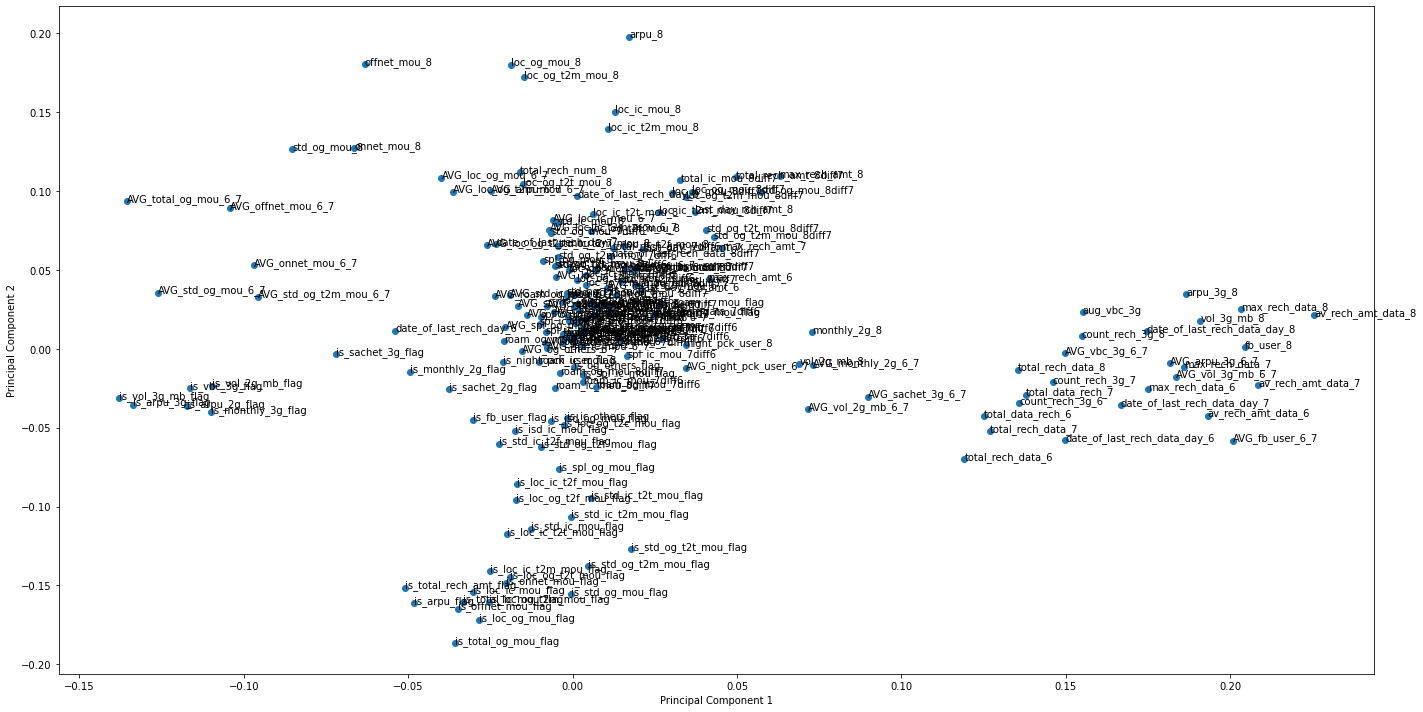

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (20,10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([6.83851166e-02, 5.37043151e-02, 3.80701065e-02, 2.91988125e-02,
       2.57235442e-02, 2.21630204e-02, 2.19718554e-02, 1.92228440e-02,
       1.66307954e-02, 1.57085017e-02, 1.51983988e-02, 1.49221137e-02,
       1.45415947e-02, 1.41046902e-02, 1.37434826e-02, 1.29909183e-02,
       1.25842039e-02, 1.21696826e-02, 1.18100927e-02, 1.16007013e-02,
       1.13774715e-02, 1.10103712e-02, 1.09320545e-02, 1.04819141e-02,
       1.02392560e-02, 9.91632976e-03, 9.74100176e-03, 9.58373448e-03,
       9.28621062e-03, 9.06393526e-03, 8.78193243e-03, 8.60468699e-03,
       8.50511387e-03, 8.38268621e-03, 8.26407681e-03, 8.19332120e-03,
       7.94503845e-03, 7.81554920e-03, 7.65028043e-03, 7.59248654e-03,
       7.51887250e-03, 7.31464034e-03, 7.27191339e-03, 7.21836436e-03,
       7.05073334e-03, 6.94687273e-03, 6.85777588e-03, 6.70086080e-03,
       6.55922784e-03, 6.30184555e-03, 6.18791783e-03, 6.04913011e-03,
       5.95300763e-03, 5.87872441e-03, 5.79964175e-03, 5.68957288e-03,
      

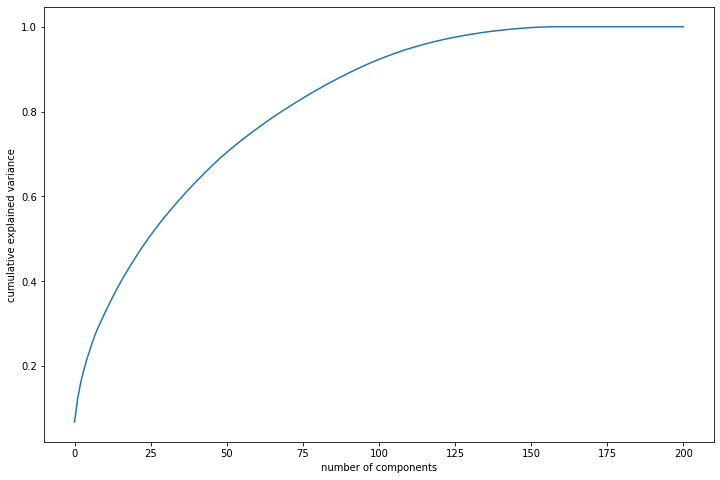

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
print("pca.explained_variance_ratio_:\n ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:
  [6.8 5.4 3.8 2.9 2.6 2.2 2.2 1.9 1.7 1.6 1.5 1.5 1.5 1.4 1.4 1.3 1.3 1.2
 1.2 1.2 1.1 1.1 1.1 1.  1.  1.  1.  1.  0.9 0.9 0.9 0.9 0.9 0.8 0.8 0.8
 0.8 0.8 0.8 0.8 0.8 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0. ]


In [ ]:
print (pca.explained_variance_ratio_.cumsum())

[0.06838512 0.12208943 0.16015954 0.18935835 0.21508189 0.23724492
 0.25921677 0.27843961 0.29507041 0.31077891 0.32597731 0.34089942
 0.35544102 0.36954571 0.38328919 0.39628011 0.40886431 0.421034
 0.43284409 0.44444479 0.45582226 0.46683263 0.47776469 0.4882466
 0.49848586 0.50840219 0.51814319 0.52772692 0.53701313 0.54607707
 0.554859   0.56346369 0.5719688  0.58035149 0.58861557 0.59680889
 0.60475393 0.61256948 0.62021976 0.62781224 0.63533111 0.64264575
 0.64991767 0.65713603 0.66418677 0.67113364 0.67799141 0.68469228
 0.6912515  0.69755335 0.70374127 0.7097904  0.7157434  0.72162213
 0.72742177 0.73311134 0.73867613 0.74415566 0.74954367 0.75488498
 0.76014418 0.76539684 0.77057091 0.77567191 0.78073638 0.78572317
 0.79053221 0.79527406 0.79995414 0.80461448 0.8092357  0.81383973
 0.81832847 0.82278887 0.82723924 0.83161156 0.83588664 0.84013511
 0.84431028 0.84844973 0.85254366 0.85660816 0.86059947 0.86453973
 0.86840354 0.87224818 0.87606008 0.87976838 0.88345758 0.8870539

In [ ]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=54)

In [ ]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(23962, 54)

In [ ]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

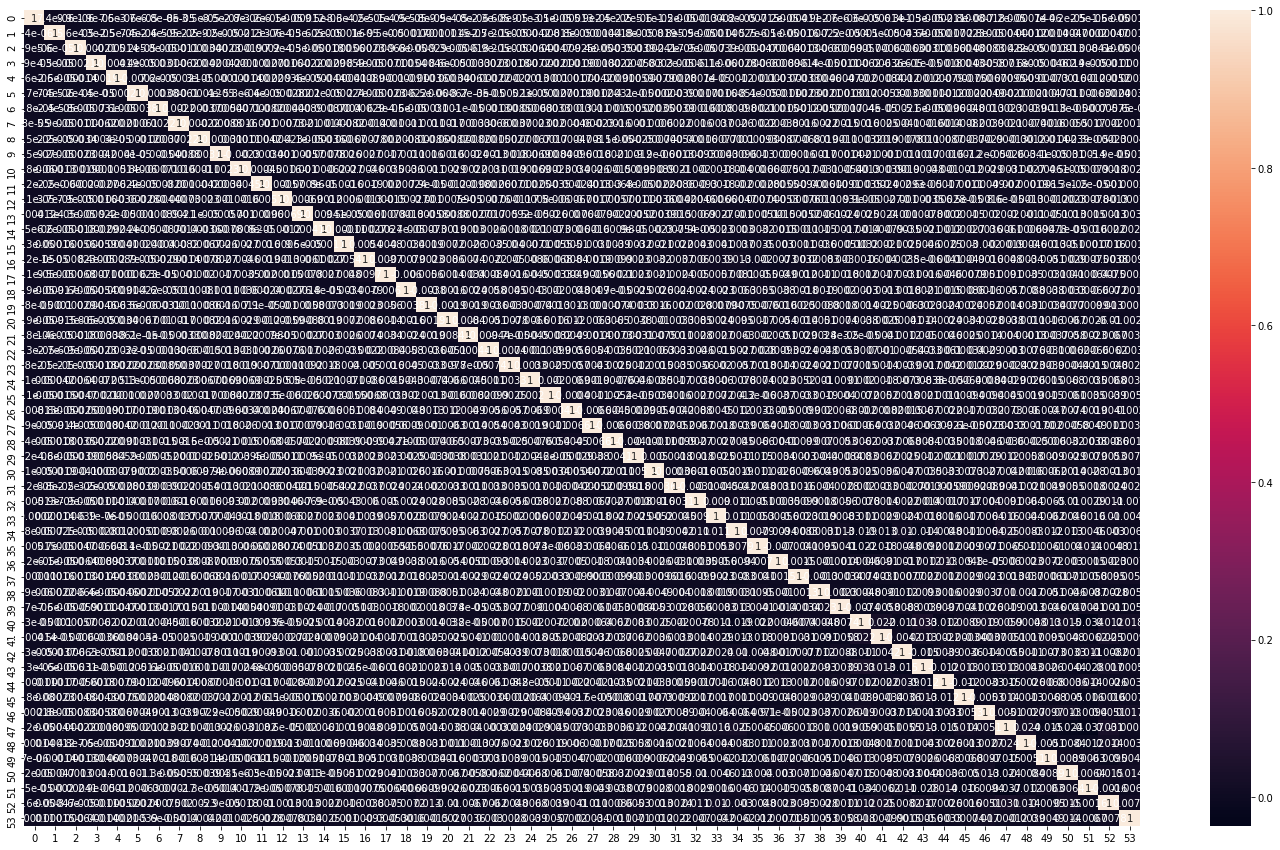

In [ ]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (25,15))
sns.heatmap(corrmat,annot = True)

In [ ]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.032630579180583576 , min corr:  -0.03666910531949685


In [ ]:
#Applying selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(5991, 54)

In [ ]:
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

from scipy.stats import norm
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

<br>

### Logistic Regression
<br>
Let's first fit a model with default hyperparameters.

In [ ]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [ ]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [ ]:
# plotLiftChart(y_test.values,pred_probs_test,"Simple Logistic Regression")

- In here we used 54 components, which could nearly explain 85% variance in dataset
- We were able to achieve 89% Area under the curve on the test set

Let's build couple of more models with different number of components. Let's see if the results changes

In [ ]:
pca_last1 = PCA(n_components=48)
df_train_pca1 = pca_last1.fit_transform(X_train)
df_test_pca1 = pca_last1.transform(X_test)
df_test_pca1.shape

(5991, 48)

In [ ]:
#training the regression model
learner_pca1 = LogisticRegression()
model_pca1 = learner_pca1.fit(df_train_pca1,y_train)
#Making prediction on the test data
pred_probs_test1 = model_pca1.predict_proba(df_test_pca1)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test1))

'0.89'

In [ ]:
pca_last2 = PCA(n_components=15)
df_train_pca2 = pca_last2.fit_transform(X_train)
df_test_pca2 = pca_last2.transform(X_test)
df_test_pca2.shape

(5991, 15)

In [ ]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.89'

## Choice of Evaluation Metric

There are several Evaluation Metrics to be considered

    Accuracy = correct predictions / total predictions = (TP + TN)/ (all) 
    Recall(sensitivity) = ability to identify Positives as true = TP/(TP + FN)
    Precision = TP/ (TP + FP) = Positive predictive value
    F Score = 2 * Precision * Recall/ (Precision * Recall)

  **Area under the Curve:**

AUC or in the classification world – AUC ROC – Area under the curve for Receiver Operating Characteristic curve is generally used to compare two different models. It used two metrics from the confusion matrix the true positive rate and false positive rate.

True positive rate (TPR), recall as described above is proportion of positive data points correctly identified as positive by the model False positive rate (FPR), which is defined as FP/(FP+TN) is all the negative data points that are mistakenly identified as positive as a proportion of all negative data points.

The TPR and FPR metrics are calculated for several threshold values and a curve is plotted with these. The resulting curve is called ROC. AUC is the computation of the area under ROC curve. For a model selection, we always look for maximizing the AUC for the classifier. As this value is comparable across models.



## Logistic Regression - with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create logistic regression
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [ ]:
# Fit grid search
best_model = clf.fit(X, Y)

In [ ]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 21.544346900318832


              precision    recall  f1-score   support

           0       0.98      0.50      0.66      5288
           1       0.20      0.94      0.33       703

    accuracy                           0.55      5991
   macro avg       0.59      0.72      0.50      5991
weighted avg       0.89      0.55      0.62      5991

Accuracy for the test dataset 55.0%
ROC for the test dataset 72.0%


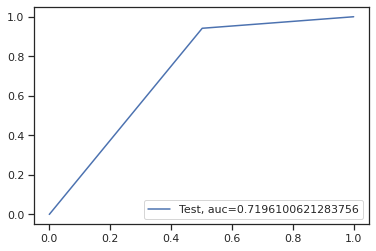

In [ ]:
predictions = best_model.predict(X_test)
prediction_probs = best_model.predict_proba(X_test)[:,1]
print(classification_report(y_test, predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

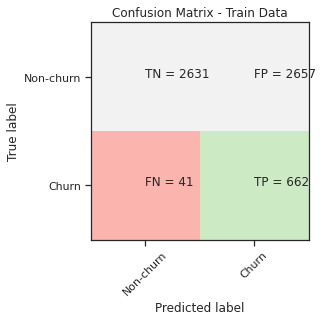

In [ ]:
cm = confusion_matrix(y_test, predictions)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

### Create Stratefied Kfold Samples




In [ ]:
from sklearn.model_selection  import StratifiedKFold
stratefied_Kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=500)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=stratefied_Kfold
        ,random_state=777
        ,max_iter=100
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=1
        ,verbose = 2
        ,n_jobs = -1
    
    )

In [ ]:
searchCV.fit(df_train_pca,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.3s finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=4, random_state=500, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=-1, penalty='l2', random_state=777, refit=True,
                     scoring='roc_auc', solver='newton-cg', tol=1, verbose=2)

In [ ]:
print("final selected 1/lambda is ", searchCV.C_)
print("final selected lambda is ", 1/searchCV.C_)

final selected 1/lambda is  [0.1]
final selected lambda is  [10.]


              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5288
           1       0.77      0.36      0.49       703

    accuracy                           0.91      5991
   macro avg       0.84      0.67      0.72      5991
weighted avg       0.90      0.91      0.90      5991

Accuracy for the test dataset 91.2%
ROC for the test dataset 89.4%


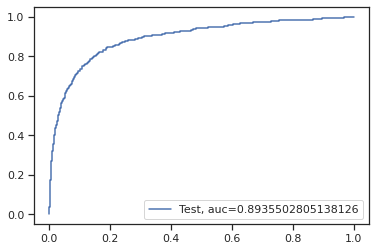

In [ ]:
#train data
preds_L2Search = searchCV.predict(df_test_pca)
preds_L2Search_probs = searchCV.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_L2Search))
accuracy = metrics.accuracy_score(y_test, preds_L2Search)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_L2Search_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()


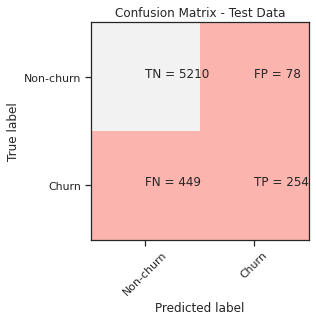

In [ ]:
cm = confusion_matrix(y_test, preds_L2Search)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")


In [ ]:
TrainedRFC= RFC_balanced.fit(df_train_pca,y_train)

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      5288
           1       0.43      0.74      0.54       703

    accuracy                           0.85      5991
   macro avg       0.69      0.80      0.73      5991
weighted avg       0.90      0.85      0.87      5991

Accuracy for the test dataset 85.3%
ROC for the test dataset 87.7%


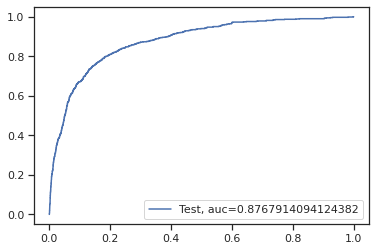

In [ ]:
preds_RFC=TrainedRFC.predict(df_test_pca)
preds_probs_RFC=TrainedRFC.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

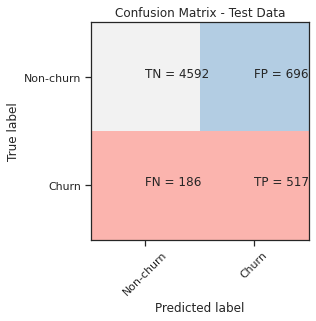

In [ ]:
cm = confusion_matrix(y_test, preds_RFC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

In [ ]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,colName,value
0,0.37,onnet_mou_8
1,0.06,vol_2g_mb_8
2,0.06,offnet_mou_8
3,0.06,arpu_8
4,0.05,max_rech_data_6
5,0.03,roam_og_mou_8
6,0.03,std_ic_t2m_mou_8
7,0.02,roam_ic_mou_8
8,0.02,av_rech_amt_data_8
9,0.02,loc_og_mou_8


In [ ]:
#VISUALISE FEATURE INPORTANCE

# plt.clf()
# from pylab import rcParams
# rcParams['figure.figsize'] = 20, 3
# sorted_feature_importance[0:50].plot(x='colName', y='value' , kind='bar', title='Random Forest Feature Importances')
# plt.ylabel('Feature Importance Score')
# plt.xlabel('Feature Name')

# plt.show()

In [ ]:
from sklearn import ensemble

# Fit classifier with out-of-bag estimates
params = {'n_estimators': 200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 10, 'random_state': 9999}
GBC = ensemble.GradientBoostingClassifier(**params)

In [ ]:
GBC.fit(df_train_pca,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=9999, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5288
           1       0.76      0.37      0.50       703

    accuracy                           0.91      5991
   macro avg       0.84      0.68      0.72      5991
weighted avg       0.90      0.91      0.90      5991

Accuracy for the test dataset 91.2%
ROC for the test dataset 88.0%


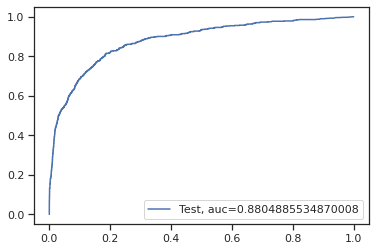

In [ ]:
preds_GBC = GBC.predict(df_test_pca)
preds_probs_GBC = GBC.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC))
accuracy = metrics.accuracy_score(y_test, preds_GBC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_GBC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

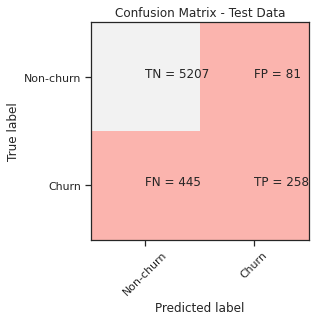

In [ ]:
cm = confusion_matrix(y_test, preds_GBC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

### Gradient Boosting with Hyperparameter tuning

Let's now try to tune hyperparameters in gradient boosting classifier. Start with with two hyperparameters - n_estimators and max_depth.

- n_estimators: integer, optional (default=10): The number of trees in the forest
- max_depth : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

#### Change in estimators & max_depth

In [ ]:
from sklearn.model_selection import GridSearchCV   #Perforing grid search

# Fit classifier with out-of-bag estimates
param_test = {'n_estimators':range(200,500,100), 'max_depth':range(5,8,1)}

gsearch1 = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        min_samples_split=20,
        min_samples_leaf=10,
        subsample=0.1,
        random_state=9999,verbose = 2,), param_grid = param_test, scoring='roc_auc',n_jobs=-1,iid=False, cv=None,verbose=2)


In [ ]:
gsearch1.fit(df_train_pca,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 11.0min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6073           0.0303           16.39s
         2           0.5934           0.0222           16.45s
         3           0.5978           0.0206           17.07s
         4           0.5812           0.0169           16.91s
         5           0.5531           0.0141           16.77s
         6           0.5365           0.0128           16.77s
         7           0.5333           0.0116           16.71s
         8           0.5180           0.0099           16.61s
         9           0.4994           0.0074           16.57s
        10           0.5030           0.0065           16.65s
        11           0.4794           0.0068           16.56s
        12           0.4815           0.0070           16.43s
        13           0.5054           0.0057           16.32s
        14           0.4812           0.0043           16.24s
        15           0.4705           0.0049           16.14s
       

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=10,
                                                  min_samples_split=20,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
   

In [ ]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 6, 'n_estimators': 200}, 0.8864148547328178)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5288
           1       0.68      0.45      0.54       703

    accuracy                           0.91      5991
   macro avg       0.81      0.71      0.75      5991
weighted avg       0.90      0.91      0.90      5991

Accuracy for the test dataset 91.1%
ROC for the test dataset 89.0%


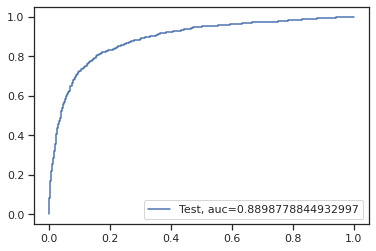

In [ ]:
preds_GBC_HT = gsearch1.predict(df_test_pca)
preds_GBC_probs_HT = gsearch1.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC_HT))
accuracy = metrics.accuracy_score(y_test, preds_GBC_HT)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_GBC_probs_HT)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

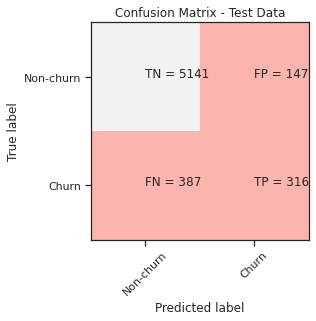

In [ ]:
cm = confusion_matrix(y_test, preds_GBC_HT)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

#### Change in min_samples_leaf

Now let's tune min_samples_leaf
- min_samples_leaf : (default=1)The minimum number of samples required to be at a leaf node:
    - If int, then consider min_samples_leaf as the minimum number.
    - If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [ ]:
param_test = {'min_samples_leaf': range(10,100,20)}

gsearch1 = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(
        n_estimators = 100,
        learning_rate=0.05,
        max_depth = 5,
        min_samples_split=100,
        subsample=0.1,
        random_state=9999,verbose = 2,), param_grid = param_test, scoring='roc_auc',n_jobs=-1,iid=False, cv=None,verbose=2)


In [ ]:
gsearch1.fit(df_train_pca,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.6min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6217           0.0294            6.79s
         2           0.6103           0.0217            6.76s
         3           0.6117           0.0195            6.59s
         4           0.5952           0.0156            6.48s
         5           0.5704           0.0130            6.39s
         6           0.5618           0.0121            6.32s
         7           0.5599           0.0101            6.28s
         8           0.5383           0.0093            6.18s
         9           0.5197           0.0083            6.08s
        10           0.5200           0.0066            5.98s
        11           0.5022           0.0064            5.98s
        12           0.5026           0.0070            5.91s
        13           0.5287           0.0059            5.83s
        14           0.5096           0.0048            5.77s
        15           0.4979           0.0050            5.70s
       

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=5,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=100,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
   

In [ ]:
gsearch1.best_params_, gsearch1.best_score_

({'min_samples_leaf': 70}, 0.8900672309770267)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5288
           1       0.70      0.44      0.54       703

    accuracy                           0.91      5991
   macro avg       0.81      0.71      0.74      5991
weighted avg       0.90      0.91      0.90      5991

Accuracy for the test dataset 91.2%
ROC for the test dataset 89.0%


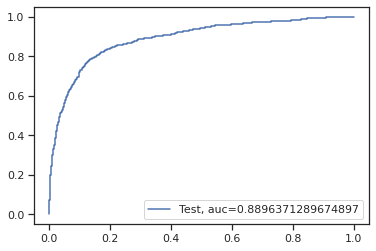

In [ ]:
preds_GBC_HT = gsearch1.predict(df_test_pca)
preds_GBC_probs_HT = gsearch1.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC_HT))
accuracy = metrics.accuracy_score(y_test, preds_GBC_HT)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_GBC_probs_HT)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

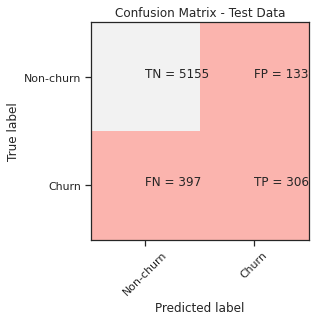

In [ ]:
cm = confusion_matrix(y_test, preds_GBC_HT)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

### SVM using Non-linear kernal

Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5288
           1       0.75      0.37      0.50       703

    accuracy                           0.91      5991
   macro avg       0.84      0.68      0.72      5991
weighted avg       0.90      0.91      0.90      5991


Accuracy for the test dataset 91.2%

ROC for the test dataset 67.8%


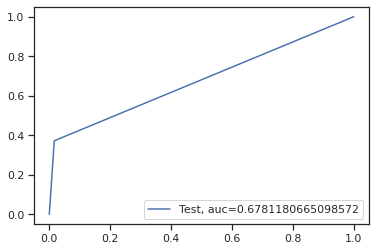

In [ ]:
# rbf kernel with other hyperparameters kept to default 
from sklearn import svm
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(df_train_pca, y_train)
# predict
predictions = svm_rbf.predict(df_test_pca)
print("Classification report: ")
print(classification_report(y_test,predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("\nAccuracy for the test dataset",'{:.1%}'.format(accuracy) )
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("\nROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

## Model Building

#### On original features (instead of principal components)

After **Hypertuning the parameters** below are the best ones

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_test = {
  'min_child_weight':[5,6],
  'max_depth': range(3,5),
#   'n_estimators':[150,200,300,400],
#   'scale_pos_weight':[1,2,3,4],
#   'colsample_bytree':[0.7,0.8], 
#   'subsample':[0.7,0.8],
  'gamma':[0,0.2,0.4]
    
}
gsearch = GridSearchCV(estimator = XGBClassifier(), param_grid = param_test, scoring='recall',n_jobs=4,iid=False, cv=3)
gsearch.fit(X_train, y_train)
#print(gsearch.grid_scores_)
print("gsearch.best_params_",gsearch.best_params_)
print("gsearch.best_score_",gsearch.best_score_)

gsearch.best_params_ {'gamma': 0, 'max_depth': 4, 'min_child_weight': 6}
gsearch.best_score_ 0.5289970277182553


In [ ]:
from xgboost import XGBClassifier
modelXg = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=4, min_child_weight=6, 
                      gamma=0,nthread=4, subsample=0.8, colsample_bytree=0.8,
                      objective= 'binary:logistic',scale_pos_weight=3,seed=29)


modelXg.fit(X_train, y_train)
y_xg = modelXg.predict(X_test)

In [ ]:
## Determine whether your model is overfitting or not , with the help of ROC.

from sklearn.metrics import precision_score,accuracy_score,roc_auc_score, recall_score,f1_score
                                                  
print(confusion_matrix(y_test, y_xg))
predictions = [value for value in y_xg]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, modelXg.predict_proba(X_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, modelXg.predict_proba(X_train)[:,1]))

[[5001  287]
 [ 202  501]]
Accuracy_score: 91.84% on test dataset
precision_score: 63.58% on test dataset
recall_score: 71.27% on test dataset
f1_score: 67.20% on test dataset
roc_auc test set 0.9377952281447782
roc_auc training set 0.9736686267074097


**Using StratifiedKFOLD**

In [ ]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=111)
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    n_jobs=4,
    max_depth=8,
    colsample_bytree=0.55,
    gamma=0.23,
    cv = cv,
    scoring='f1_weighted'
)

xgb_model.fit(X=X_train,y=y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.55,
              cv=StratifiedKFold(n_splits=10, random_state=111, shuffle=True),
              gamma=0.23, learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              scoring='f1_weighted', seed=None, silent=None, subsample=1,
              verbosity=1)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring = 'roc_auc')
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.9272226  0.93633415 0.93386634 0.93067194 0.93696916 0.94367668
 0.94300629 0.93274171 0.92540045 0.9339854 ]
Mean: 0.9343874724107298
Standard Deviation: 0.005657534610452902


Cross validating the models showed that the accuracy values were in fact not arbitary and proofed that both models are performing very well.

A high mean corresponds to a more stable performance and a low standard deviation corresponds to smaller range of results.

In [ ]:
predictions_train = xgb_model.predict(X_train)
print(classification_report(y_train, predictions_train))
predictions = xgb_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21410
           1       0.98      0.96      0.97      2552

    accuracy                           0.99     23962
   macro avg       0.99      0.98      0.98     23962
weighted avg       0.99      0.99      0.99     23962

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5288
           1       0.75      0.53      0.62       703

    accuracy                           0.92      5991
   macro avg       0.84      0.75      0.79      5991
weighted avg       0.92      0.92      0.92      5991



In [ ]:
def Performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
Performance(Model=xgb_model,Y=y_test,X=X_test)

## Feature Importance Using XGBOOST

Gain for feature Importance
The Gain implies the relative contribution of the corresponding feature to the model calculated by taking each feature’s contribution for each tree in the model. A higher value of this metric when compared to another feature implies it is more important for generating a prediction
The Gain is the most relevant attribute to interpret the relative importance of each feature.

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,18))
plot_importance(modelXg,importance_type='gain', max_num_features=50, height=0.8, ax=ax)
plt.show()

### Random Forest

In [ ]:
# Create the parameter grid based on the results of random search
param_grid = {
 'max_depth': [8,10,12],
 'min_samples_leaf': range(100, 400, 200),
 'min_samples_split': range(200, 500, 200),
 'n_estimators': [100,200, 300],
 'max_features': [12, 15, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
 cv = 3, n_jobs = 4,verbose = 1) 

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
rf = RandomForestClassifier(max_depth=12,
max_features=20,
min_samples_leaf=100,
min_samples_split=200,
n_estimators=300,
random_state=10)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

In [ ]:
predictions_train = rf.predict(X_train)
print(classification_report(y_train, predictions_train))
predictions = RF2.predict(X_test)
print(classification_report(y_test, predictions))

In [ ]:
preds_probs_RFC=rf.predict_proba(X_test)[:,1]

In [ ]:
Performance(Model=rf,Y=y_test,X=X_test)